<a href="https://colab.research.google.com/github/PardhaSaradhi74/Python/blob/master/DLICP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/My Drive/imdb_master[1].csv",encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values


   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


tokenizing data

In [4]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [5]:
sentences = tokenizer.texts_to_matrix(sentences)

In [6]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [7]:
model = Sequential()
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 3s 42us/step - loss: 0.8825 - acc: 0.5043 - val_loss: 0.8467 - val_acc: 0.5121
Epoch 2/5
75000/75000 [==============================] - 1s 19us/step - loss: 0.7923 - acc: 0.5751 - val_loss: 0.8436 - val_acc: 0.5133
Epoch 3/5
75000/75000 [==============================] - 1s 19us/step - loss: 0.6891 - acc: 0.6794 - val_loss: 0.8686 - val_acc: 0.5153
Epoch 4/5
75000/75000 [==============================] - 1s 19us/step - loss: 0.4997 - acc: 0.8131 - val_loss: 0.9482 - val_acc: 0.5106
Epoch 5/5
75000/75000 [==============================] - 1s 19us/step - loss: 0.2883 - acc: 0.9261 - val_loss: 1.0671 - val_acc: 0.5160


In [8]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [ ]:
# from keras.layers import Embedding
# X_train.shape


In [9]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [10]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 16s 208us/step - loss: 1.0084 - acc: 0.4919 - val_loss: 0.8649 - val_acc: 0.5052
Epoch 2/5
75000/75000 [==============================] - 15s 206us/step - loss: 0.8198 - acc: 0.5476 - val_loss: 0.8552 - val_acc: 0.5053
Epoch 3/5
75000/75000 [==============================] - 15s 206us/step - loss: 0.7158 - acc: 0.6443 - val_loss: 0.9029 - val_acc: 0.5003
Epoch 4/5
75000/75000 [==============================] - 15s 207us/step - loss: 0.5617 - acc: 0.7513 - val_loss: 1.0304 - val_acc: 0.4900
Epoch 5/5
75000/75000 [==============================] - 15s 206us/step - loss: 0.4124 - acc: 0.8325 - val_loss: 1.2188 - val_acc: 0.4815


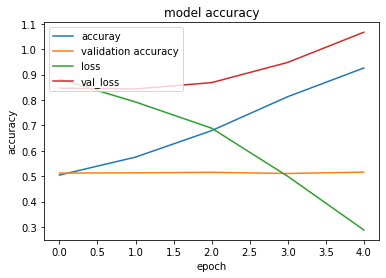

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [12]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [13]:
sentences= twenty_train.data
y=twenty_train.target

In [14]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [15]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [16]:
h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 8s 990us/step - loss: 12.4298 - acc: 0.0565 - val_loss: 3.0233 - val_acc: 0.0657
Epoch 2/5
8485/8485 [==============================] - 8s 975us/step - loss: 3.0063 - acc: 0.0575 - val_loss: 3.0017 - val_acc: 0.0399
Epoch 3/5
8485/8485 [==============================] - 8s 976us/step - loss: 2.9803 - acc: 0.0527 - val_loss: 2.9956 - val_acc: 0.0495
Epoch 4/5
8485/8485 [==============================] - 8s 977us/step - loss: 2.9790 - acc: 0.0566 - val_loss: 2.9933 - val_acc: 0.0530
Epoch 5/5
8485/8485 [==============================] - 8s 975us/step - loss: 2.9765 - acc: 0.0585 - val_loss: 2.9953 - val_acc: 0.0537


In [33]:
x=n.predict_classes(X_test[[8],:])

In [34]:
print("Actual Prediction",y_test[8],"Predicted Prediction",x)

Actual Prediction 11 Predicted Prediction [11]


In [ ]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)